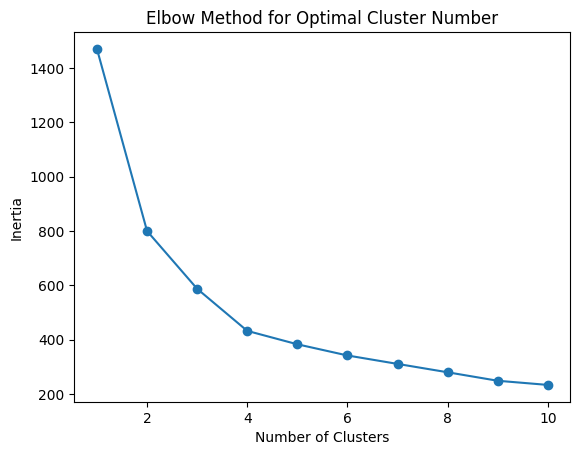

Silhouette Score: 0.3853708700893055


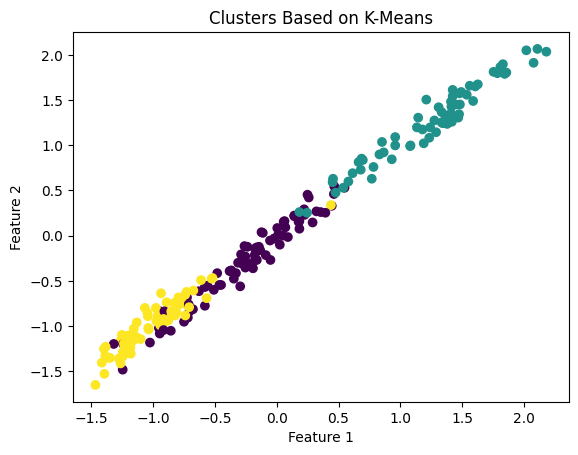

In [75]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import silhouette_score

# Load the dataset
df = pd.read_csv('seeds.csv')

# Select features for clustering (replace with your actual features)
features = df[['area', 'perimeter', 'compactness', 'length', 'width', 'asymmetry', 'length.1']]

# Handle NaN values using SimpleImputer
imputer = SimpleImputer(strategy='mean')  # You can choose a different strategy if needed
features_imputed = imputer.fit_transform(features)

# Standardize the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features_imputed)

# Determine the optimal number of clusters using the Elbow Method
inertia_values = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)  # Set n_init explicitly
    kmeans.fit(features_scaled)
    inertia_values.append(kmeans.inertia_)

# Plot the Elbow Method
plt.plot(range(1, 11), inertia_values, marker='o')
plt.title('Elbow Method for Optimal Cluster Number')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

# Based on the Elbow Method, choose the optimal number of clusters
optimal_clusters = 3  # Change this based on the Elbow Method plot

# Perform clustering with K-Means
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42, n_init=10)  # Set n_init explicitly
df['cluster'] = kmeans.fit_predict(features_scaled)

# Evaluate clustering using silhouette score
silhouette_avg = silhouette_score(features_scaled, df['cluster'])
print(f'Silhouette Score: {silhouette_avg}')

# Visualize the clusters (for 2D features)
plt.scatter(features_scaled[:, 0], features_scaled[:, 1], c=df['cluster'], cmap='viridis')
plt.title('Clusters Based on K-Means')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()
